In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('student-por.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
data.shape

(649, 33)

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


1. Please load the given Student Alcohol Consumption data student-por.csv. Check
out more details about the data on Kaggle. 

1.1. [10 pts]
Please check and remove records with any NAs, and drop the grade columns
G2 and G3. Then convert all the categorical variables into R factors or Python
Pandas Categoricals.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
data_cleaned = data.dropna()
data_cleaned.shape

(649, 33)

In [8]:
# checking for missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
data_cleaned = data_cleaned.drop(columns=['G2', 'G3'])

In [10]:
data_cleaned.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,9
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,11


In [11]:
# Convert all categorical variables into Pandas Categoricals
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].apply(lambda x: x.astype('category'))

# Display the information of the cleaned dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    int64   
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    int64   
 7   Fedu        649 non-null    int64   
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

1.2. [10 pts]
Here we consider the first period grade (G1) as the outcome/target. Please
draw the density plot of G1 and perform normality tests to check if it is
approximately normally distributed. Then, perform a proper bivariate test to
check whether sex is associated with G1 (the significant level is 0.05). 

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_44086/1170029471.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['G1'], kde=True, hist=True)


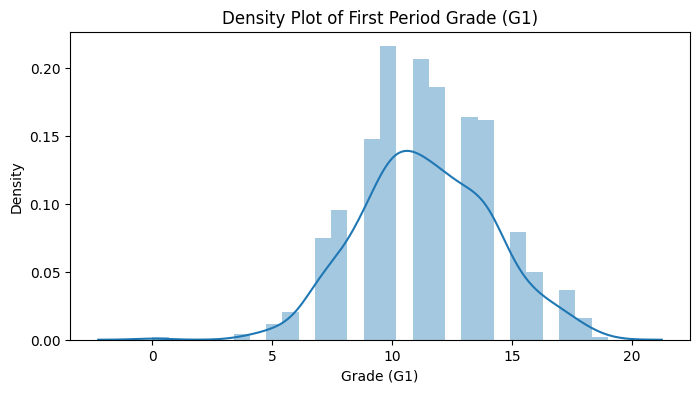

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind

# Draw the density plot of G1
plt.figure(figsize=(8, 4))
sns.distplot(data_cleaned['G1'], kde=True, hist=True)
plt.title('Density Plot of First Period Grade (G1)')
plt.xlabel('Grade (G1)')
plt.ylabel('Density')
plt.show()

In [13]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality on the 'G1' column
shapiro_test_result = shapiro(data['G1'])
shapiro_p_value = shapiro_test_result.pvalue

# Print the p-value
print(f"Shapiro-Wilk Test P-Value: {shapiro_p_value}")

# Determine and print if G1 is normally distributed
if shapiro_p_value > 0.05:
    print("The G1 data is approximately normally distributed.")
else:
    print("The G1 data is not approximately normally distributed.")


Shapiro-Wilk Test P-Value: 4.9233394747716375e-06
The G1 data is not approximately normally distributed.


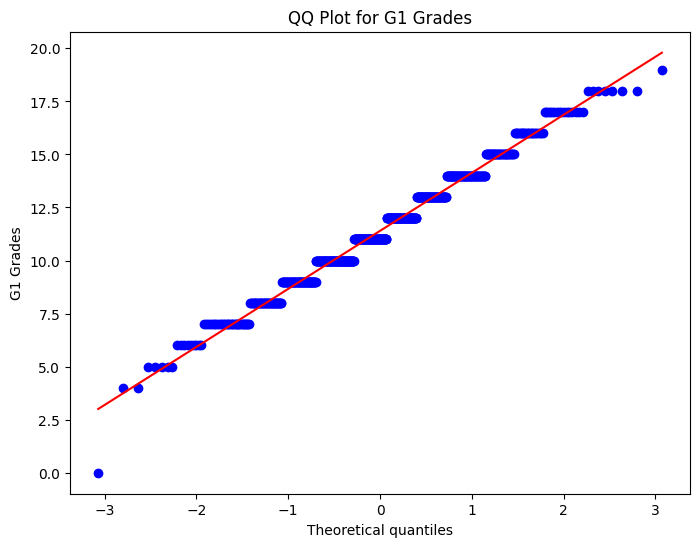

In [14]:
import scipy.stats as stats

# Generating a QQ plot for the 'G1' column
plt.figure(figsize=(8, 6))
stats.probplot(data['G1'], dist="norm", plot=plt)
plt.title('QQ Plot for G1 Grades')
plt.ylabel('G1 Grades')
plt.show()


In [15]:
from scipy.stats import pearsonr

data_cleaned['sex_encoded'] = data_cleaned['sex'].apply(lambda x: 0 if x == 'M' else 1)

# Calculate the Pearson's correlation coefficient between sex and G1
pearson_correlation, pearson_p_value = pearsonr(data_cleaned['sex_encoded'], data_cleaned['G1'])

print(f"Pearson's Correlation Coefficient: {pearson_correlation}")
print(f"P-Value for Pearson's Correlation: {pearson_p_value}")

# Check if the correlation is significant
significant_level = 0.05
if pearson_p_value < significant_level:
    print("The Pearson correlation between sex and G1 is significant.")
else:
    print("The Pearson correlation between sex and G1 is not significant.")

Pearson's Correlation Coefficient: 0.10410856829980719
P-Value for Pearson's Correlation: 0.007946869649725062
The Pearson correlation between sex and G1 is significant.


1.3. [5 pts]
Please create a function rmse(y_true, y_pred), which computes the RMSE of
the model prediction.

In [16]:
def rmse(y_true, y_pred):
    """
    Compute the Root Mean Square Error (RMSE).

    Parameters:
    y_true (array-like): True values of the target variable.
    y_pred (array-like): Predicted values of the target variable.

    Returns:
    float: The RMSE of the predictions.
    """
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred)) ** 2))

# Example usage:
# y_true = [3, -0.5, 2, 7, 4.2]
# y_pred = [2.5, 0.0, 2, 8, 5.1]
# print(rmse(y_true, y_pred))

In [17]:
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0.0, 2, 8, 5.1]
print(rmse(y_true, y_pred))

0.679705818718657


1.4. [25 pts]
Please split the data into training (70%) and testing (30%) sets with a random
seed 0, and train models to predict the outcome/target G1. (Note that you
should rescale the data if needed). Use any statistical learning and feature
selection techniques to create a better model with low testing RMSE. Please
report both the training and the testing RMSE of your models. Note that your
testing RMSE must be at least lower than 2.35

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include='category').columns.tolist()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Define the target variable 'G1' and the features
X = data_cleaned.drop(columns=['G1','sex_encoded'])
y = data_cleaned['G1']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Rescale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {rmse_train}")
print(f"Testing RMSE: {rmse_test}")


Training RMSE: 2.19344342284062
Testing RMSE: 2.294842458834741


In [19]:
data_cleaned.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,sex_encoded
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,4,0,1
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,2,9,1
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,6,12,1
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,0,14,1
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,0,11,1


2. Please load the given data Heart Disease Health Indicators Dataset
(heart_disease_health_indicators_BRFSS2015.csv). 

2.1. [15 pts]
Split the data into training (70%) and testing (30%) datasets with
random seed 0 ). Fit Logistic regression models that predict
“HeartDiseaseorAttack”.Use or create any variables that may better predict the
HeartDiseaseorAttack. What are the accuracy of predictions on both the
training and the testing datasets, given the default probability cutoff value 0.5?

In [20]:
# Load the dataset from the CSV file
data= pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

2.1. [15 pts]
Split the data into training (70%) and testing (30%) datasets with
random seed 0 ). Fit Logistic regression models that predict
“HeartDiseaseorAttack”.Use or create any variables that may better predict the
HeartDiseaseorAttack. What are the accuracy of predictions on both the
training and the testing datasets, given the default probability cutoff value 0.5?

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

# Split the data into training and testing sets with a 70-30 split and random seed 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_prob = log_reg.predict_proba(X_train)[:, 1]  # Probability estimates for the training set
y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]    # Probability estimates for the testing set

# Apply the default probability cutoff value of 0.5
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate the accuracy on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.907752173717169
Testing Accuracy: 0.9074293072637444


2.2. [15 pts]
We can see that there is a class imbalance problem with the outcome/target
(HeartDiseaseorAttack). We understand that adjusting predicted class
probability cutoff may help predict the rare cases. What is the optimal cutoff
value based on Youden's J index? Please also report your model True Positive
Rates (Sensitivities) with different cutoff values (0.5 and the “optimal” value).

In [23]:
import numpy as np
from sklearn.metrics import roc_curve

# Assuming y_test and y_test_pred_prob are already defined from the logistic regression model
# y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, cutoff = roc_curve(y_test, y_test_pred_prob)

# Calculate Youden's J index to find the optimal cutoff
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_cutoff = cutoff[optimal_idx]

# Find the True Positive Rate for the default cutoff 0.5
closest_05_idx = np.abs(cutoff - 0.5).argmin()
tpr_05 = tpr[closest_05_idx]

# True Positive Rate at the optimal cutoff
tpr_optimal = tpr[optimal_idx]

print("Optimal Cutoff based on Youden's J index:", optimal_cutoff)
print("True Positive Rate at Cutoff 0.5:", tpr_05)
print("True Positive Rate at Optimal Cutoff:", tpr_optimal)


Optimal Cutoff based on Youden's J index: 0.0905744718402236
True Positive Rate at Cutoff 0.5: 0.13477422907488987
True Positive Rate at Optimal Cutoff: 0.811398678414097


2.3. [20 pts]
Plot the ROC curves of your models for both training and testing
datasets. Compare and report your model performance in terms of AUCs.

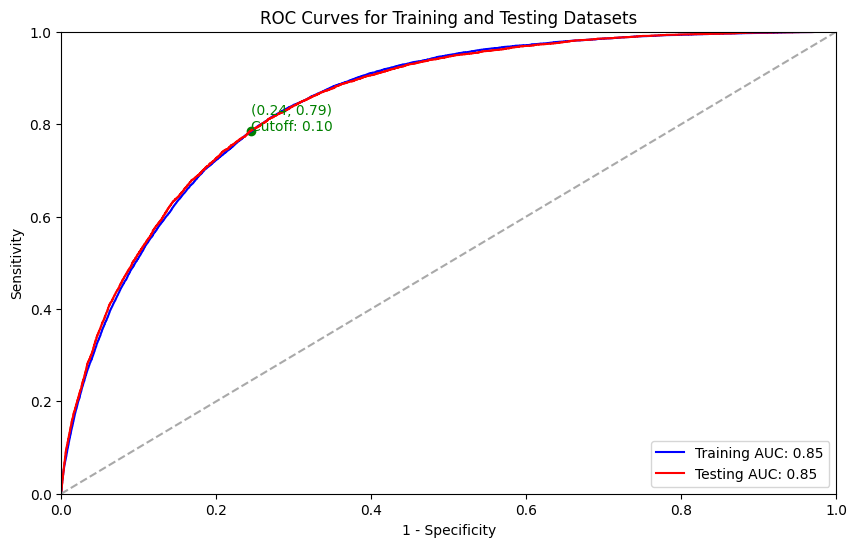

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
auc_train = auc(fpr_train, tpr_train)

# Calculate the ROC curve for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
auc_test = auc(fpr_test, tpr_test)

# Find the point closest to the top-left corner in the ROC curve for the testing set
closest_point_idx = np.argmin(np.sqrt((1 - tpr_test) ** 2 + fpr_test ** 2))
optimal_cutoff = thresholds_test[closest_point_idx]
closest_fpr, closest_tpr = fpr_test[closest_point_idx], tpr_test[closest_point_idx]

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training AUC: {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', label=f'Testing AUC: {auc_test:.2f}')
plt.scatter(closest_fpr, closest_tpr, color='green', marker='o')  # Mark the closest point
plt.text(closest_fpr, closest_tpr, f'({closest_fpr:.2f}, {closest_tpr:.2f})\nCutoff: {optimal_cutoff:.2f}', color='green')  # Annotate the point
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves for Training and Testing Datasets')
plt.legend(loc='lower right')
plt.show()
